<a href="https://colab.research.google.com/github/ishit-k9/Anomaly-Detection/blob/main/Anomaly_Detection_bank_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **BANK TRANSACTION ANOMALY DETECTION**

---



**FRAMIMG THE PROBLEM**

* We've a dataset of Bank transactions in which there are some fraud transactions. Detect these anomalies and report.

**EVALUATION METRICS**

* Since, it is an Unsupervised learning, we can use sillhoutte score to calculate the "authenticity of seperation" or we can just show the clustered plot which shows potential frauds.

**ASSUMPTIONS**

* We're not building a general anomaly classifier instead of this, we're just Flagging the frauds for reporting

**DATA DESCRIPTION**

TransactionID: Unique alphanumeric identifier for each transaction.

AccountID: Unique identifier for each account, with multiple transactions per account.

TransactionAmount: Monetary value of each transaction, ranging from small everyday expenses to larger purchases.

TransactionDate: Timestamp of each transaction, capturing date and time.

TransactionType: Categorical field indicating 'Credit' or 'Debit' transactions.

Location: Geographic location of the transaction, represented by U.S. city names.

DeviceID: Alphanumeric identifier for devices used to perform the transaction.

IP Address: IPv4 address associated with the transaction, with occasional changes for some accounts.

MerchantID: Unique identifier for merchants, showing preferred and outlier merchants for each account.

AccountBalance: Balance in the account post-transaction, with logical correlations based on transaction type and amount.

PreviousTransactionDate: Timestamp of the last transaction for the account, aiding in calculating transaction frequency.

Channel: Channel through which the transaction was performed (e.g., Online, ATM, Branch).

CustomerAge: Age of the account holder, with logical groupings based on occupation.

CustomerOccupation: Occupation of the account holder (e.g., Doctor, Engineer, Student, Retired), reflecting income patterns.

TransactionDuration: Duration of the transaction in seconds, varying by transaction type.

LoginAttempts: Number of login attempts before the transaction, with higher values indicating potential anomalies.

## START

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

**Graph palettes by chatGPT**

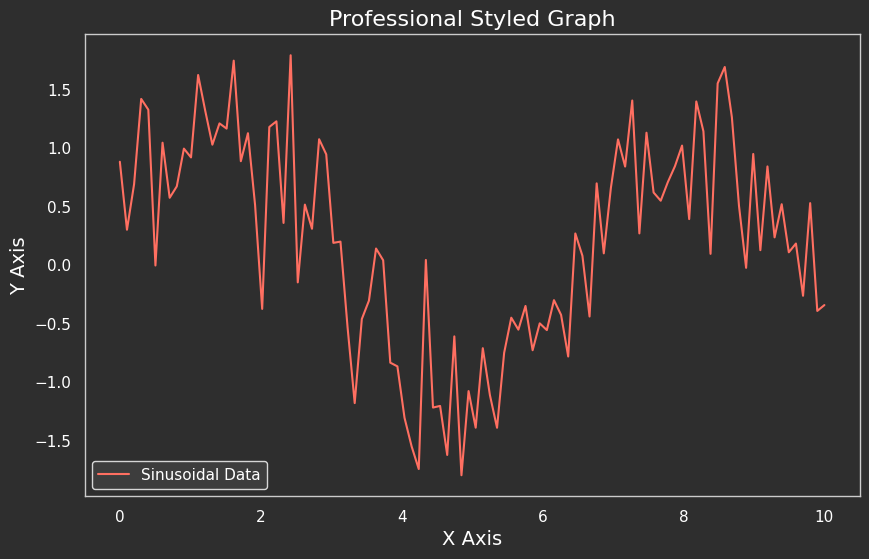

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn theme with a dark style and a bright color palette.
sns.set_theme(style="dark", palette="bright")

# Use a dark background for the figure but adjust colors for contrast.
plt.style.use('dark_background')

# Customize Matplotlib parameters for a refined, professional look.
plt.rcParams.update({
    'axes.edgecolor': '#CCCCCC',      # Light grey borders for axes.
    'axes.linewidth': 1.0,
    'axes.facecolor': '#2E2E2E',      # A slightly lighter dark grey background.
    'figure.facecolor': '#2E2E2E',    # Figure background.
    'grid.color': '#555555',          # Moderate grey grid lines.
    'grid.linestyle': '--',
    'grid.linewidth': 0.7,
    'font.size': 12,
    'axes.labelcolor': '#FFFFFF',     # White axis labels.
    'xtick.color': '#FFFFFF',         # White tick labels.
    'ytick.color': '#FFFFFF',
    'legend.edgecolor': '#FFFFFF',
    'legend.facecolor': '#424242',    # Darker grey legend background.
    'savefig.facecolor': '#2E2E2E',   # Save figures with dark background.
    'savefig.edgecolor': '#2E2E2E'
})

# Create sample data for demonstration.
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.5, size=len(x))

# Create the plot.
fig, ax = plt.subplots(figsize=(10, 6))
# Use a bright color (e.g., coral) for the line to enhance contrast.
sns.lineplot(x=x, y=y, ax=ax, label="Sinusoidal Data", color="#FF6F61")
ax.set_title("Professional Styled Graph", fontsize=16)
ax.set_xlabel("X Axis", fontsize=14)
ax.set_ylabel("Y Axis", fontsize=14)
ax.legend()

# Display the plot.
plt.show()


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Clustering and Anomaly Detection Datasets/bank_transactions_data_2.csv')
bank = df

## Summary of data

In [ ]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


## DATA CLEANING & PREPROCESSING

* Check Data types and correct them.

* Outlier detection and removal.(Not removing outliers coz they may be anomalies).

* Handling missing values.(No missing values in our case so we'll skip).


In [ ]:
df['TransactionDate'] = df['TransactionDate'].astype('datetime64[ms]')
df['PreviousTransactionDate'] = df['PreviousTransactionDate'].astype('datetime64[ms]')

In [ ]:
df_ver1 = df.copy()
new_df = df.copy()

In [ ]:
new_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


## EXPLORATORY DATA ANALSIS (EDA)

* Uni-variate analysis.

* Multi-variate analysis.

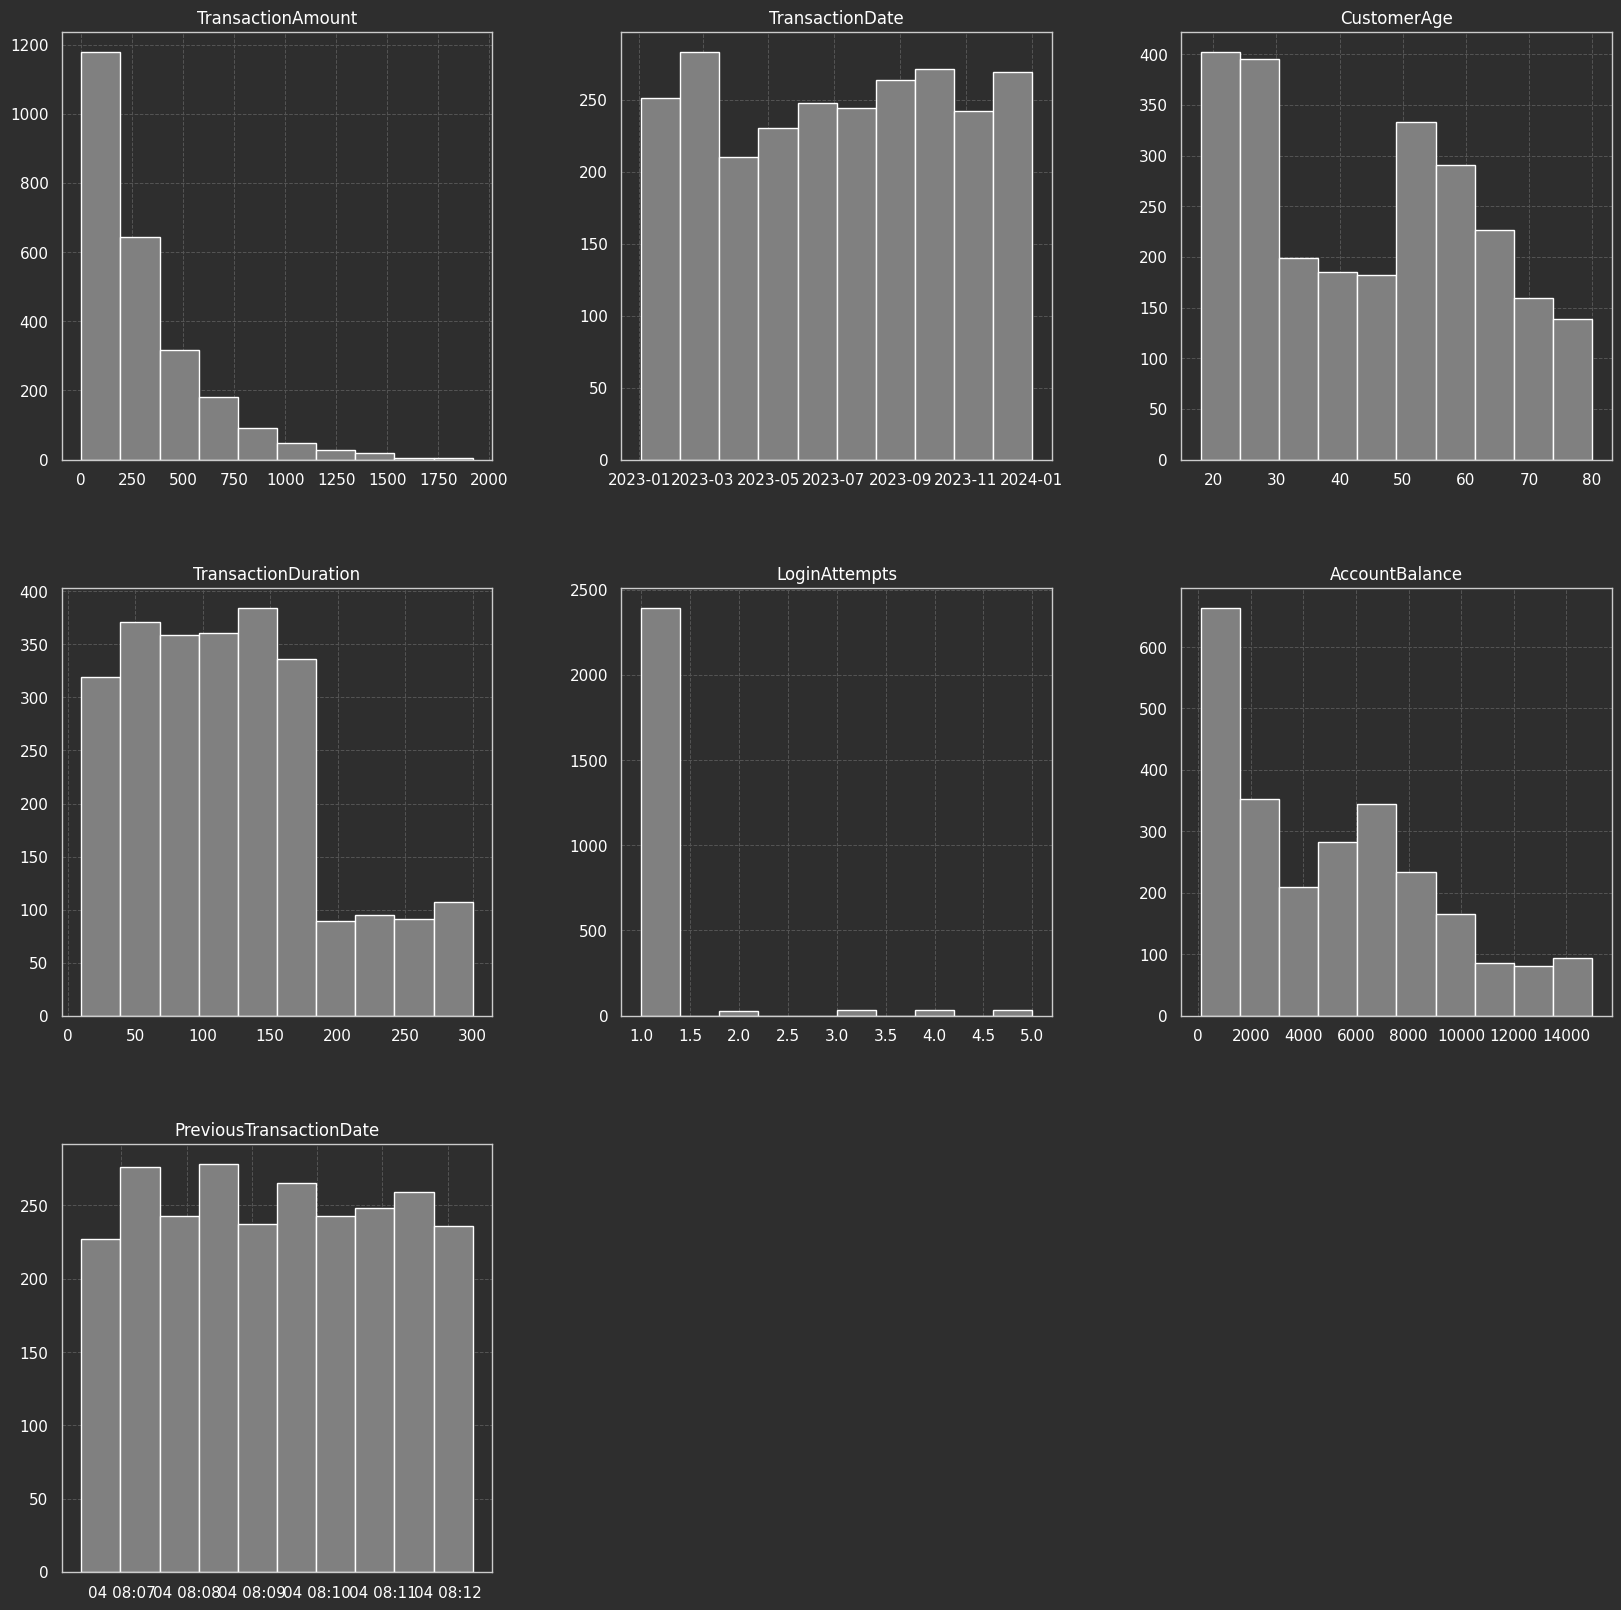

In [ ]:
df.hist(figsize=(20,20), color = 'grey')
plt.show()

In [ ]:
x = ['Channel','CustomerOccupation', 'TransactionType']

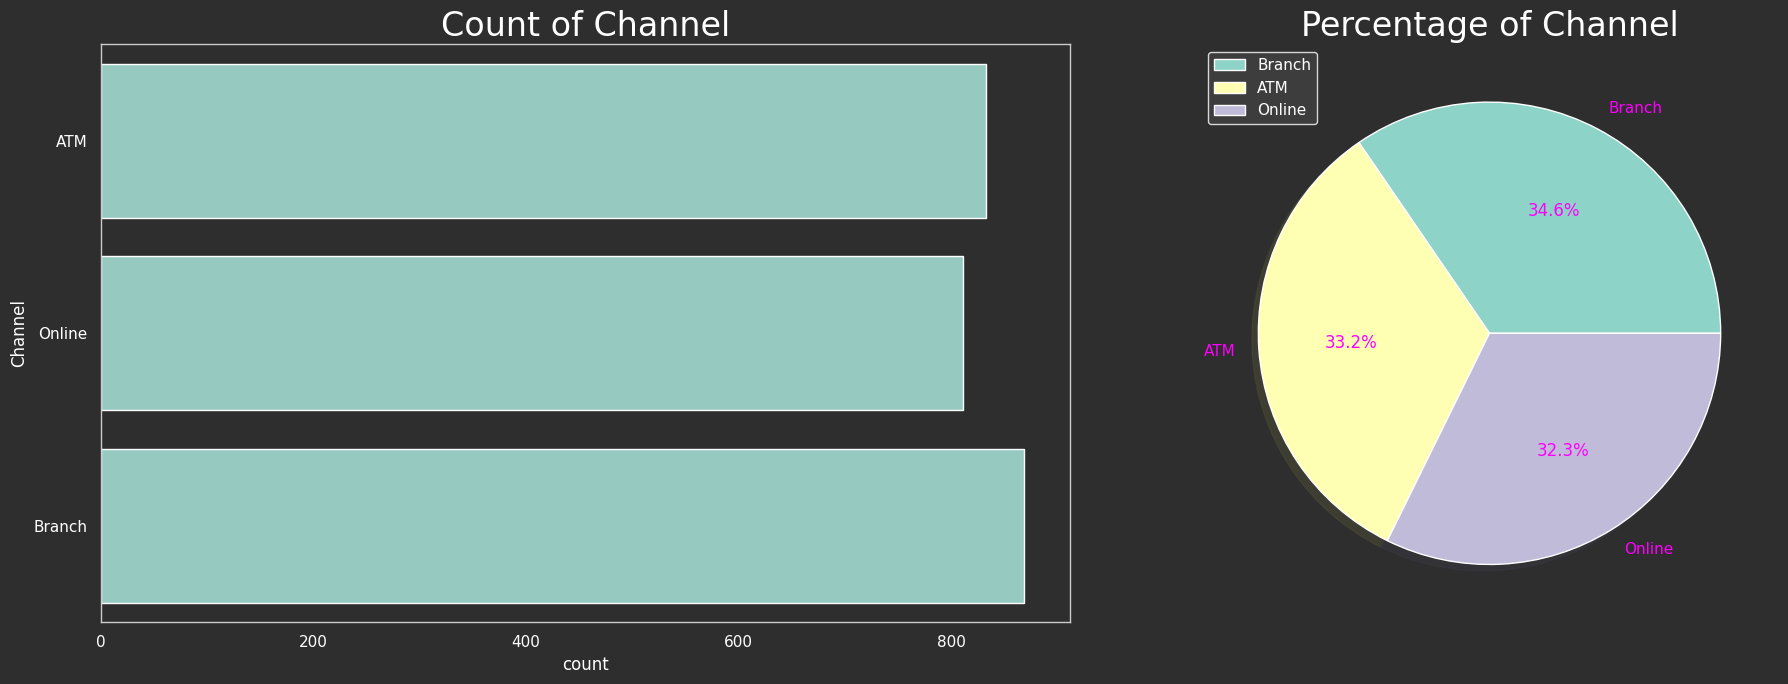

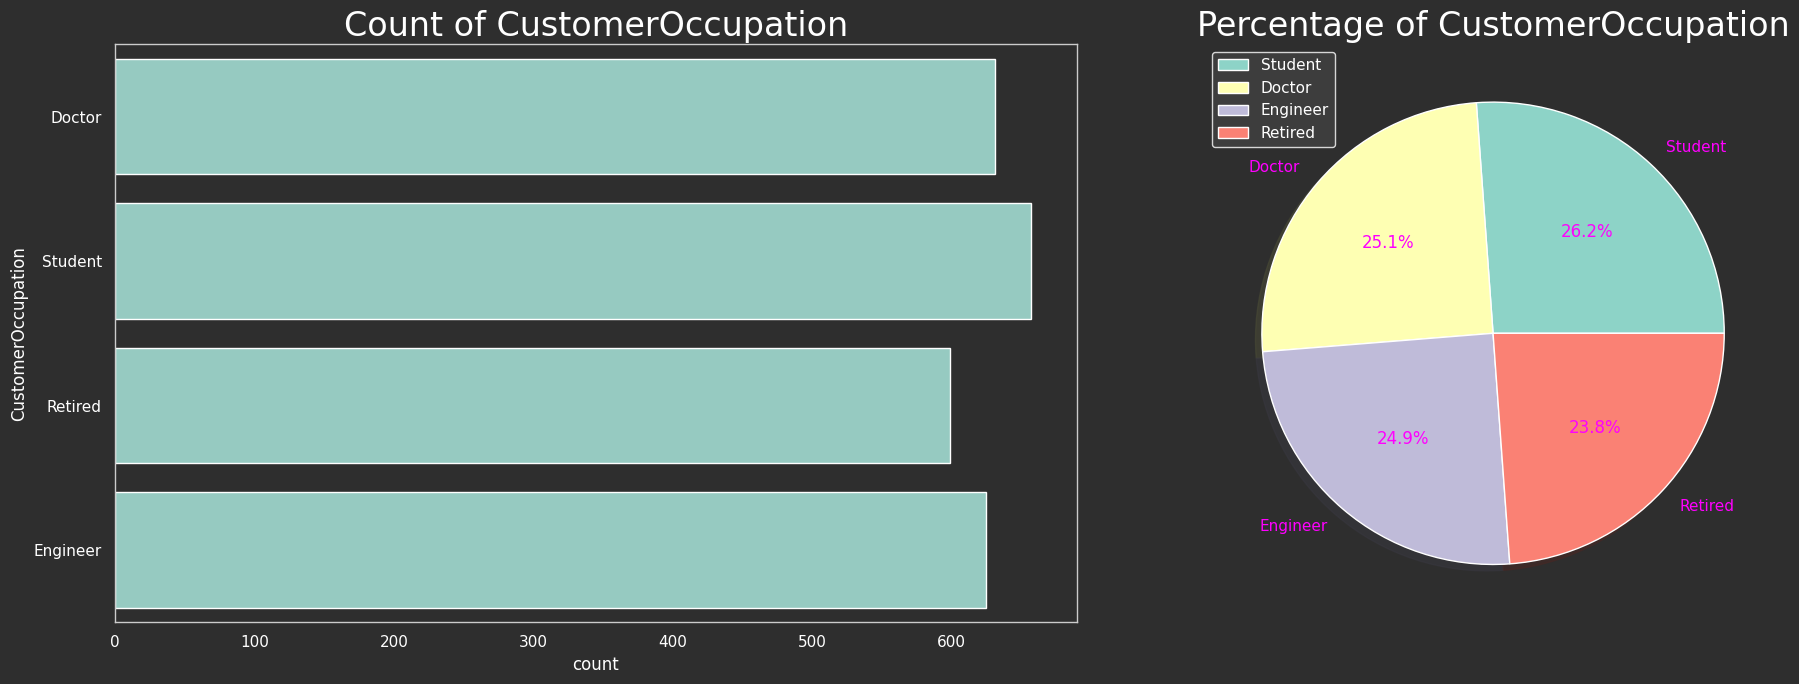

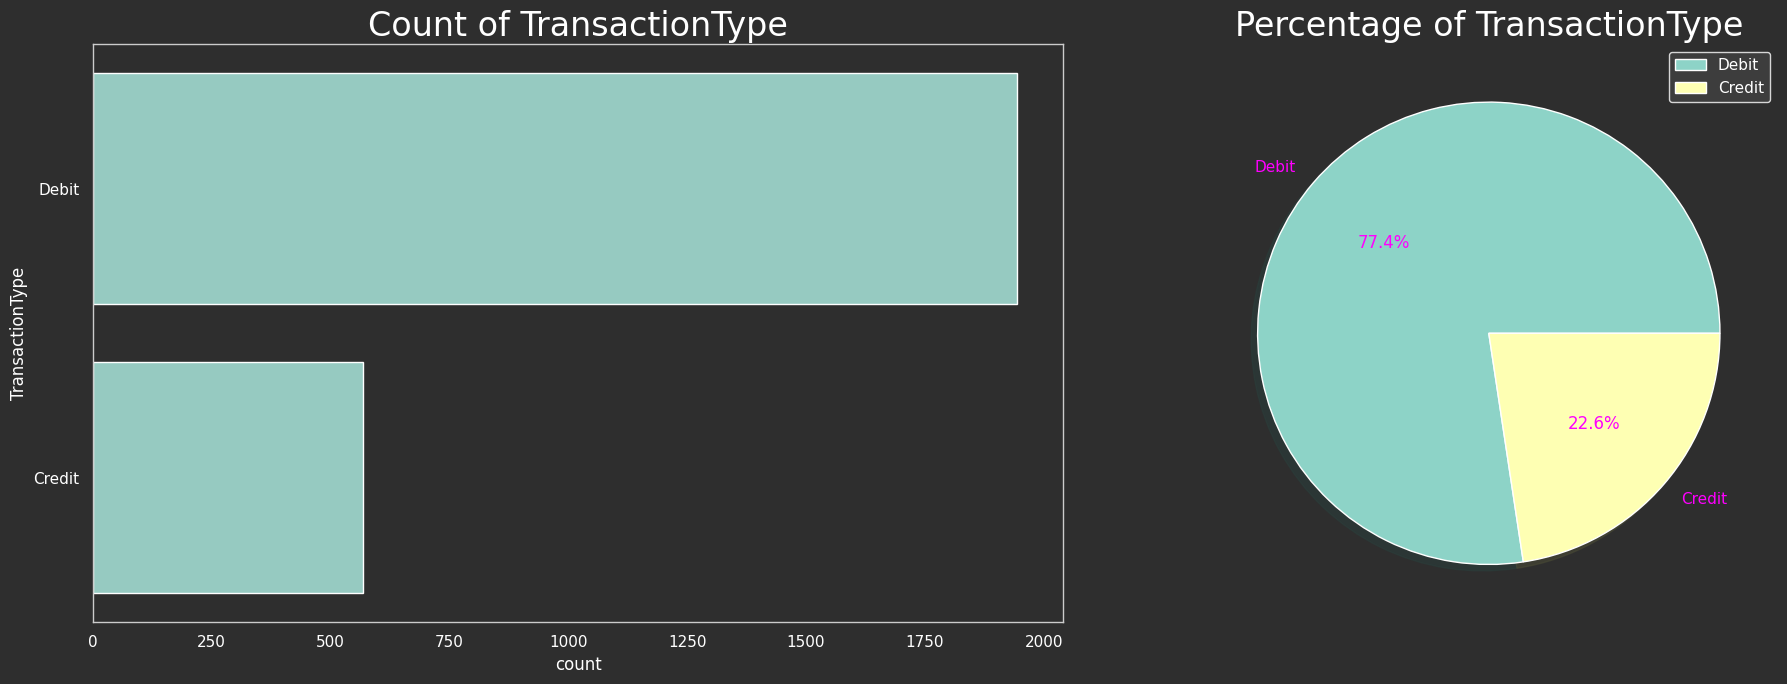

In [ ]:
for i in x:
    fig, ax = plt.subplots(1,2, figsize = (20,7))
    sns.countplot(df[i], ax=ax[0])
    channelpct = df[i].value_counts()/ df[i].value_counts().sum() * 100
    ax[1].pie(channelpct, autopct = '%0.1f%%', labels =channelpct.index, textprops = dict(color = 'magenta'),  shadow = True )
    plt.legend()
    ax[0].set_title(f'Count of {i}', fontsize = 24)
    ax[1].set_title(f'Percentage of {i}', fontsize = 24)
    plt.tight_layout()
plt.show()

<Axes: xlabel='TransactionDate', ylabel='TransactionAmount'>

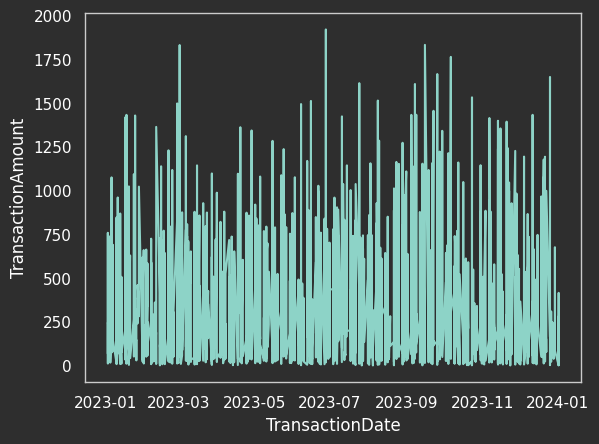

In [ ]:
sns.lineplot(x = df['TransactionDate'], y = df['TransactionAmount'])

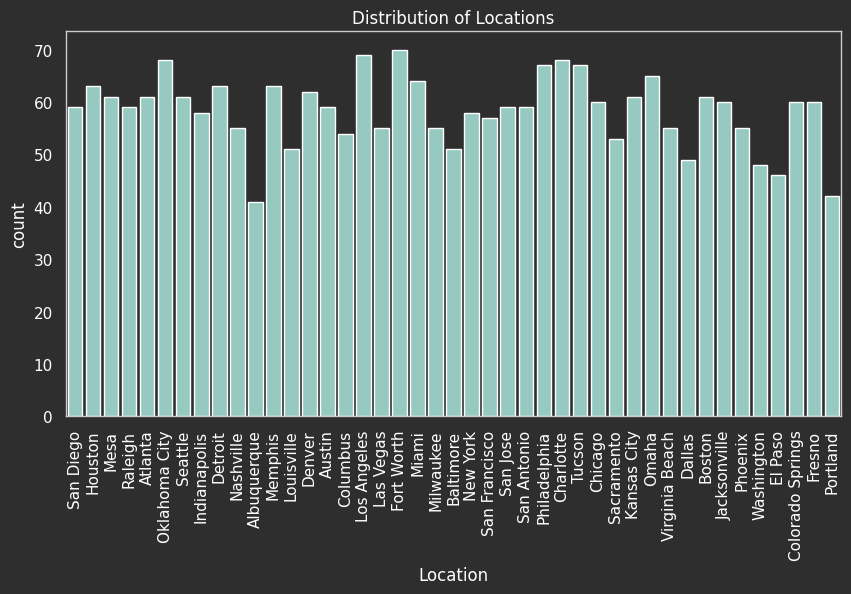

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['Location'])
plt.xticks(rotation = 90)
plt.title('Distribution of Locations')
plt.show()

Text(0.5, 1.0, 'Transaction Amount v/s Account Balance')

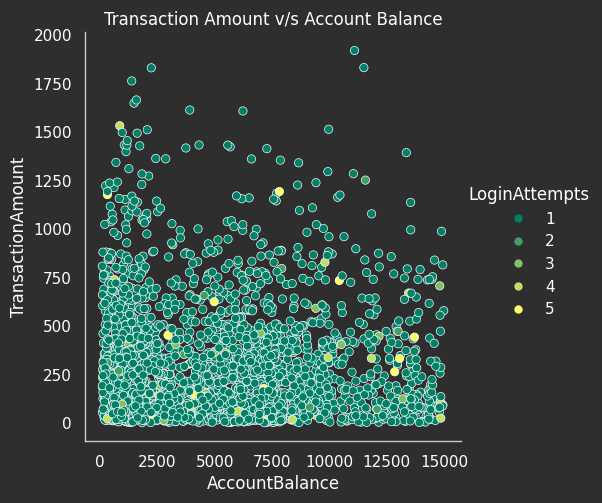

In [ ]:
sns.relplot(kind = 'scatter', x= df['AccountBalance'],
                y = df['TransactionAmount'],palette= 'summer',
             hue = df['LoginAttempts'])
plt.title('Transaction Amount v/s Account Balance')

<Axes: xlabel='Channel', ylabel='TransactionAmount'>

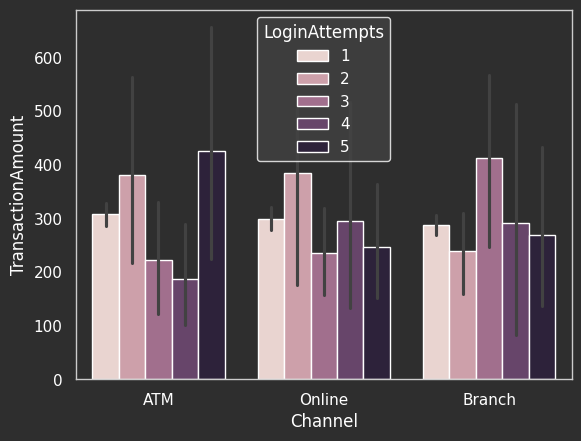

In [ ]:
sns.barplot(x = df['Channel'], y = df['TransactionAmount'], hue=df['LoginAttempts'])

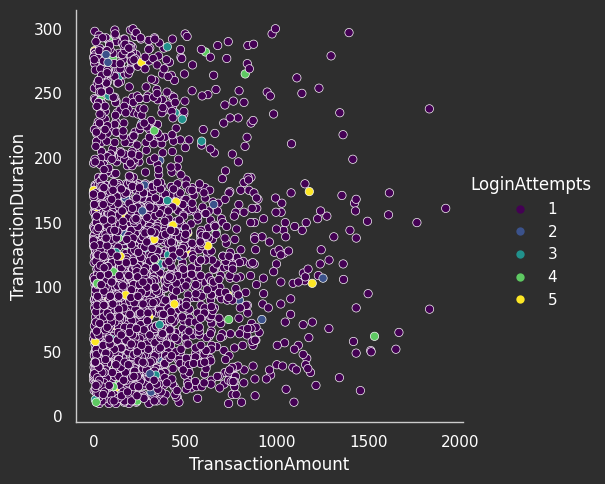

In [ ]:
sns.relplot(x = df['TransactionAmount'], y = df['TransactionDuration'], hue = df['LoginAttempts'], palette = 'viridis')

Login attempt doesn't clearly account for anomalies.

because there are some outliers with login attempt 1 which have long durations and high amount transaction.

<Axes: ylabel='Count'>

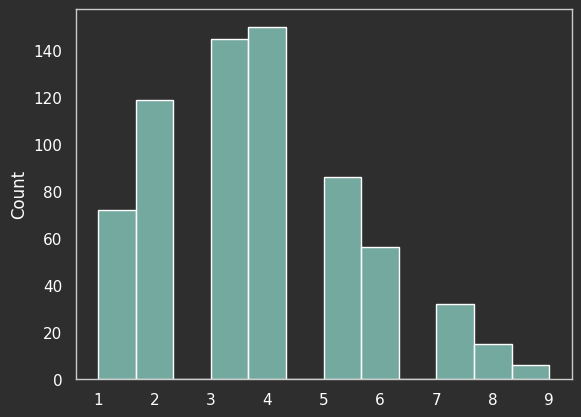

In [ ]:
sns.histplot((df.groupby(['DeviceID'])['IP Address'].nunique().values))

On an average per device, the IP Addresses used are 3-4, whereas in some transactions there ARE 9 IP used with same device.

In [ ]:
df['ip_used_per_device'] = df.groupby(['DeviceID'])['IP Address'].transform('count')

In [ ]:
df[df['ip_used_per_device'] == 9]

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,ip_used_per_device
22,TX000023,AC00095,52.20,2023-06-06 18:54:15,Debit,Atlanta,D000142,133.63.96.21,M022,Online,39,Engineer,120,1,8974.93,2024-11-04 08:07:01,9
63,TX000064,AC00325,601.40,2023-05-30 17:43:25,Credit,Philadelphia,D000548,125.225.212.244,M001,Branch,56,Engineer,104,1,8458.29,2024-11-04 08:08:01,9
119,TX000120,AC00092,115.83,2023-05-22 17:09:52,Debit,Fresno,D000663,124.6.134.78,M086,Branch,39,Engineer,167,1,6481.04,2024-11-04 08:10:02,9
151,TX000152,AC00242,332.93,2023-11-20 16:29:48,Credit,Albuquerque,D000548,113.115.81.178,M039,Branch,35,Engineer,293,1,2788.20,2024-11-04 08:08:14,9
183,TX000184,AC00077,110.93,2023-04-07 16:38:15,Credit,Virginia Beach,D000142,101.223.82.253,M036,Branch,19,Student,201,1,1952.35,2024-11-04 08:10:53,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,TX002262,AC00086,340.13,2023-02-06 17:23:52,Debit,Mesa,D000203,165.35.58.173,M029,Branch,24,Student,32,3,1149.74,2024-11-04 08:11:48,9
2312,TX002313,AC00166,294.77,2023-10-10 17:16:59,Debit,Philadelphia,D000451,27.93.195.98,M087,Online,77,Retired,101,1,2272.17,2024-11-04 08:10:02,9
2347,TX002348,AC00363,584.51,2023-08-25 17:47:07,Debit,Denver,D000697,113.201.172.36,M010,ATM,74,Retired,76,1,3254.56,2024-11-04 08:08:49,9
2446,TX002447,AC00014,719.76,2023-03-30 17:50:23,Debit,San Francisco,D000548,161.25.82.11,M038,Branch,19,Student,190,1,690.52,2024-11-04 08:11:25,9


they are potentially frauds.

<Axes: ylabel='Count'>

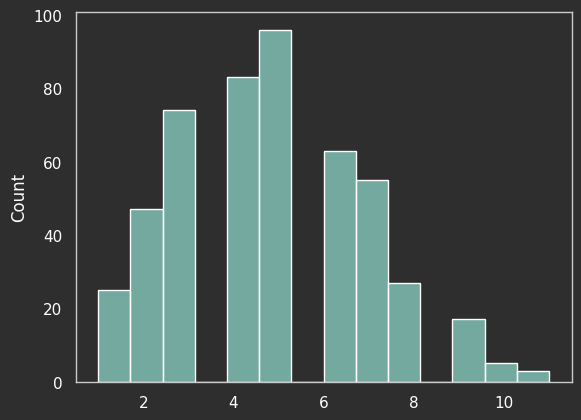

In [ ]:
sns.histplot(df.groupby(['AccountID'])['Location'].nunique().values)

# **FEATURE ENGINEERING**

This is the feature engineering step which is very crucial for training model in all context.

* **Feature Engineering Approach for Anomaly detection**

Here, in our data, we have historical data from each AccountID(Account Holder), so we can approach feature engineering by evaluating features based on particular user's behaviour.

(Grouping based on AccountID)


But, if we have **Unique AccountID** then we can't evaluate features based on user's behaviour and then we have to evaluate features **Globally**.

In [ ]:
bank.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,ip_used_per_device
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,6
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,5
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,5
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,6
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,3


In [ ]:
bank['TransactionDate'] = bank['TransactionDate'].astype('datetime64[ms]')
bank['PreviousTransactionDate'] = bank['PreviousTransactionDate'].astype('datetime64[ms]')

Datetime features

In [ ]:
bank['TransactionHours'] = bank['TransactionDate'].dt.hour
bank['day_of_week'] = bank['TransactionDate'].dt.dayofweek
bank['TimeElapsed'] = bank.groupby(['AccountID'])['TransactionDate'].diff().dt.total_seconds().fillna(0) / 60

* Z-Score w.r.t each account id

In [ ]:
mean = bank.groupby(['AccountID'])['TransactionAmount'].transform('mean')
std = bank.groupby(['AccountID'])['TransactionAmount'].transform('std')
bank['Z-score'] = (bank['TransactionAmount'] - mean) / (std + 1e-6)

* Does a user uses new location, device, IP and merchant in transaction.

In [ ]:
bank['IsNewLocation'] = (bank['Location'] != bank.groupby(['AccountID'])['Location'].transform('first')).astype(int)
bank['IsNewDevice'] = (bank['Location'] != bank.groupby(['AccountID'])['DeviceID'].transform('first')).astype(int)
bank['IsNewMerchant'] = (~bank['MerchantID'].isin(bank.groupby('AccountID')['MerchantID'].transform('nunique'))).astype(int)

* transaction amount and balance ratio

In [ ]:
bank['AmountBalRatio'] = bank['TransactionAmount'] / (bank['AccountBalance'] + 1e-6)

* HIgh login attempts

In [ ]:
bank['HighLogs'] = (bank['LoginAttempts'] > 3).astype(int)

* Risk Score

In [ ]:
risk_score = {
    'Student': 0,
    'Engineer': 1,
    'Doctor':2,
    'Retired':0
}

In [ ]:
bank['risk_score'] = bank['CustomerOccupation'].map(risk_score)
bank['TransactionType'] = bank['TransactionType'].map({'Credit':1, 'Debit':0})

* Drop irrelevant columns

In [ ]:
bank.drop(columns=['TransactionID', 'AccountID', 'Location', 'DeviceID', 'IP Address', 'CustomerOccupation',
                   'MerchantID','TransactionDate', 'PreviousTransactionDate'], inplace = True)

In [ ]:
bank

,TransactionAmount,TransactionType,Channel,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,ip_used_per_device,TransactionHours,day_of_week,TimeElapsed,Z-score,IsNewLocation,IsNewDevice,IsNewMerchant,AmountBalRatio,HighLogs,risk_score
0,14.09,0,ATM,70,81,1,5112.21,6,16,1,0.000000,-0.915239,0,1,1,0.002756,0,2
1,376.24,0,ATM,68,141,1,13758.91,5,16,1,0.000000,0.298035,0,1,1,0.027345,0,2
2,126.29,0,Online,19,56,1,1122.35,5,18,0,0.000000,-0.560249,0,1,1,0.112523,0,0
3,184.50,0,Online,26,25,1,8569.06,6,16,4,0.000000,-0.188923,0,1,1,0.021531,0,0
4,13.45,1,Online,26,198,1,7429.40,3,17,0,0.000000,-0.860385,0,1,1,0.001810,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,1,Branch,33,109,1,12690.79,3,17,2,33162.200000,2.174847,1,1,1,0.067467,0,2
2508,251.54,0,Branch,48,177,1,254.75,5,17,2,17277.833333,-0.313812,1,1,1,0.987399,0,2
2509,28.63,0,Branch,56,146,1,3382.91,5,17,0,286622.833333,-0.733694,1,1,1,0.008463,0,0
2510,185.97,0,Online,23,19,1,1776.91,2,16,4,-64828.083333,-0.475602,1,1,1,0.104659,0,0


In [ ]:
bank.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Channel,0
CustomerAge,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0
ip_used_per_device,0
TransactionHours,0
day_of_week,0


In [ ]:
bank['Z-score'] = bank['Z-score'].fillna(0)

## Anomaly Detection using KMeans

**SCALING AND OHE HOT ENCODING**

In [ ]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
arr = ohe.fit_transform(bank[['Channel']])
ohedf = pd.DataFrame(arr, columns = ohe.get_feature_names_out() )
bank = pd.concat((bank, ohedf), axis = 1)

In [ ]:
bank.drop('Channel', axis = 1, inplace=True)

**PIPELINE**

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler())
])

In [ ]:
scaled = pipe.fit_transform(bank)

**ELBOW METHOD**

<Axes: >

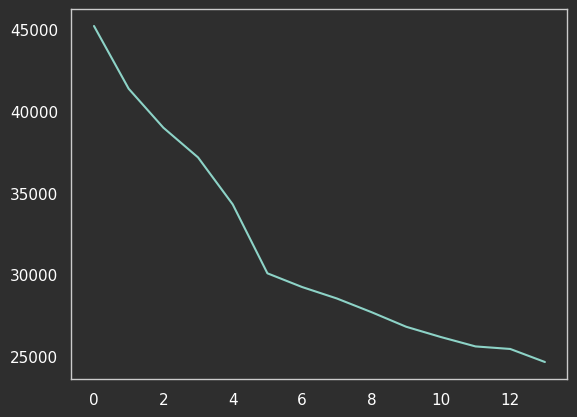

In [ ]:
from sklearn.cluster import KMeans
l=[]
for i in range(1,15):
  km = KMeans(n_clusters = i)
  km.fit_predict(scaled)
  l.append(km.inertia_)
sns.lineplot(l)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
arr = pca.fit_transform(scaled)
pcadf = pd.DataFrame(arr, columns = ['PC1', 'PC2'])

In [ ]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KMeans(n_clusters=6))
])

In [ ]:
labels = pipe2.fit_predict(scaled)
pcadf['kmeans_labels'] = labels

In [ ]:
model = pipe2.named_steps['model']

In [ ]:
centers = model.fit_transform(scaled)
min_dist = np.min(centers, axis = 1)
threshold = np.percentile(min_dist, 97)
pcadf['DistanceFromClosestCluster'] = min_dist
pcadf['isAnomaly'] = (pcadf['DistanceFromClosestCluster'] > threshold).astype(int)

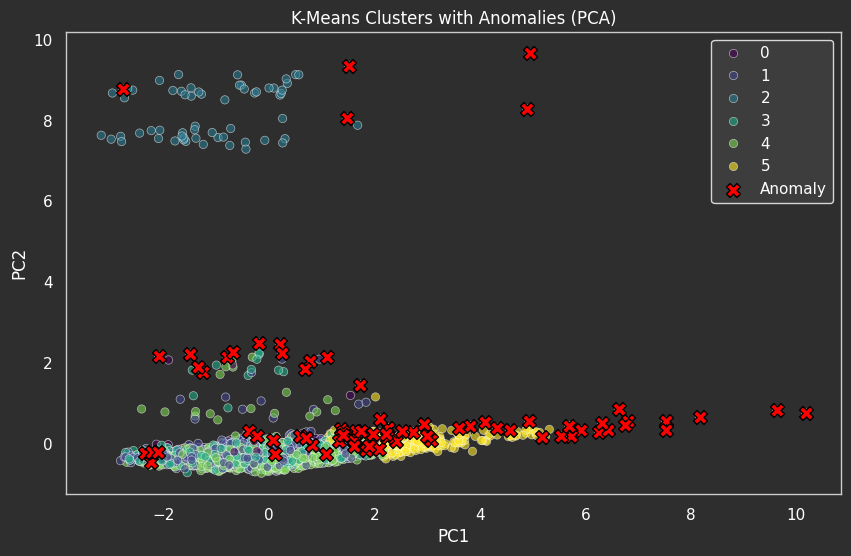

total anomalies detected : 76


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='kmeans_labels',
    data=pcadf,
    palette='viridis',
    alpha=0.6
)

# Overlay anomalies
anomalies = pcadf[pcadf['isAnomaly'] == 1]
plt.scatter(
    anomalies['PC1'], anomalies['PC2'],
    marker='X', s=100, c='red', edgecolor='black',
    label='Anomaly'
)

plt.title('K-Means Clusters with Anomalies (PCA)')
plt.legend()
plt.show()
print('total anomalies detected :', len(anomalies))

## Anomaly Detection using Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
forest_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', IsolationForest(contamination=0.03))
])

In [ ]:
forest_pred = forest_pipe.fit_predict(bank)

In [ ]:
iso_pca = PCA(n_components=2)
arr2 = iso_pca.fit_transform(scaled)
forest_pcadf = pd.DataFrame(arr2, columns=['PC1', 'PC2'])
forest_pcadf['forest_preds'] = forest_pred
forest_pcadf['forest_preds'] = forest_pcadf['forest_preds'].map({1: 'Normal', -1: 'Fraud'})

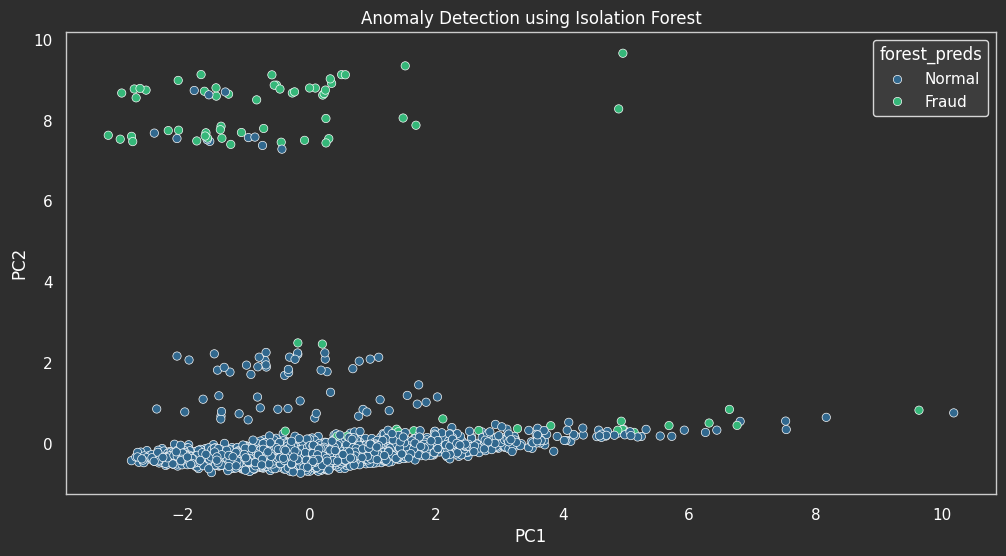

total fraud detected :  76


In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = forest_pcadf, x = 'PC1', y = 'PC2', hue = 'forest_preds', palette = 'viridis')
plt.title('Anomaly Detection using Isolation Forest')
plt.show()
print('total fraud detected : ' ,len(forest_pcadf[forest_pcadf['forest_preds'] == 'Fraud']))

## Anomaly Detection using DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

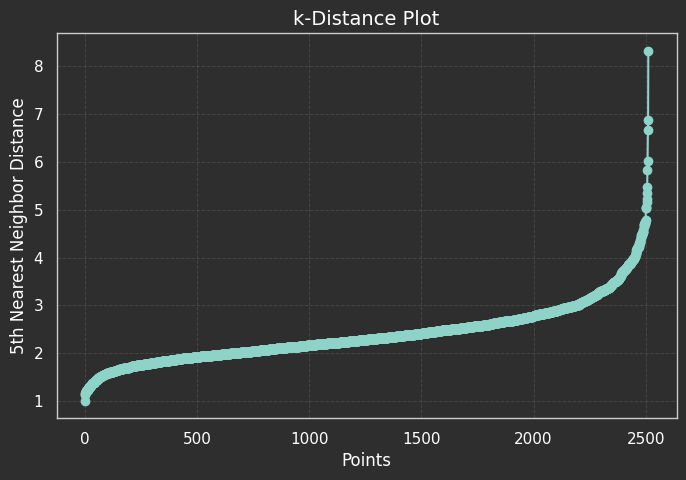

In [ ]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled)
distances, indices = nbrs.kneighbors(scaled)

# Sort the 5th nearest neighbor distances
sorted_distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(8, 5))
plt.plot(sorted_distances
         , marker='o', linestyle='-')
plt.title('k-Distance Plot', fontsize=14)
plt.xlabel('Points', fontsize=12)
plt.ylabel('5th Nearest Neighbor Distance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
db = DBSCAN(eps = 3)
dbscan_preds = db.fit_predict(scaled)

In [ ]:
dbpca= PCA(n_components=2)
arr3 = dbpca.fit_transform(scaled)
dbscan_pcadf = pd.DataFrame(arr3, columns= ['PC1', 'PC2'])
dbscan_pcadf['db_preds'] = dbscan_preds
dbscan_pcadf['db_preds'] = np.where(dbscan_pcadf['db_preds'] == -1, 'Fraud', 'Normal')

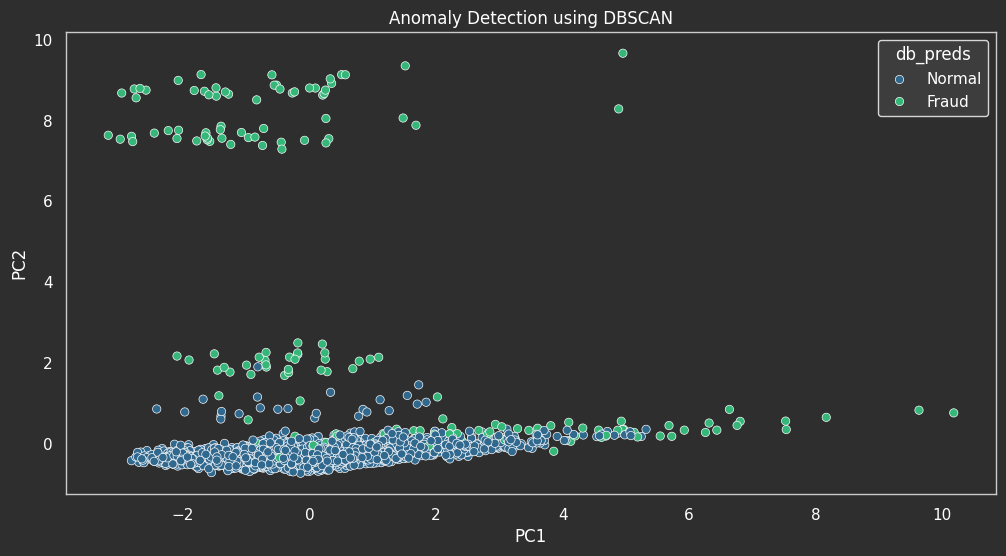

total fraud detected : 180


In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = dbscan_pcadf, x = 'PC1', y = 'PC2', hue = 'db_preds', palette = 'viridis')
plt.title('Anomaly Detection using DBSCAN')
plt.show()
print('total fraud detected :', len(dbscan_pcadf[dbscan_pcadf['db_preds'] == 'Fraud']))

## Anomaly Detection using LOF (Local Outlier Factor)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
lof = LocalOutlierFactor(n_neighbors=6)
lof_labels = lof.fit_predict(scaled)

In [ ]:
pca = PCA(n_components=2)
arr4 = pca.fit_transform(scaled)
lof_pcadf = pd.DataFrame(arr4, columns = ['PC1', 'PC2'])
lof_pcadf['lof_labels'] = lof_labels
lof_pcadf['lof_labels'] = np.where(lof_pcadf['lof_labels'] == -1, 'Fraud', 'Normal')

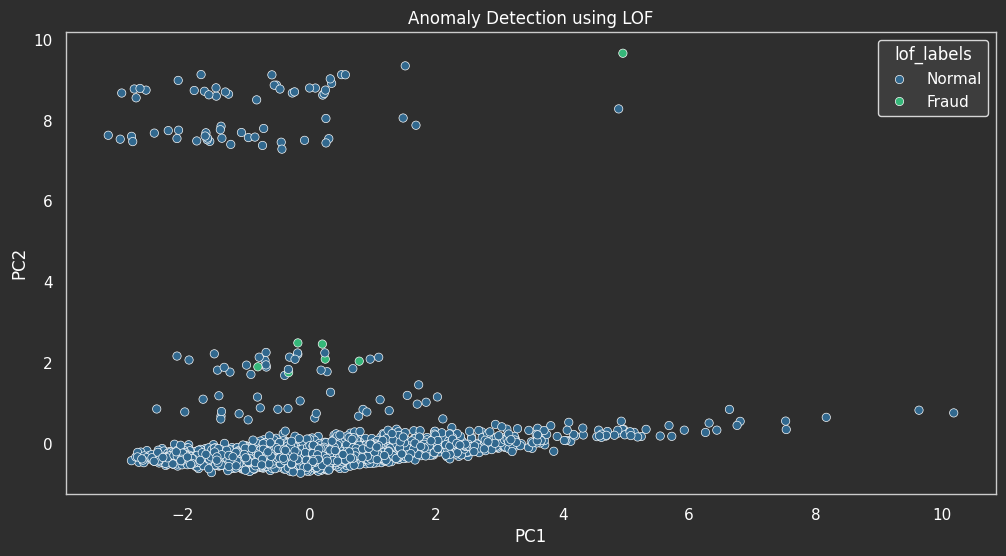

total anomalies calculated : 10


In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = lof_pcadf, x = 'PC1', y = 'PC2', hue = 'lof_labels', palette='viridis')
plt.title('Anomaly Detection using LOF')
plt.show()
print('total anomalies calculated :',len(lof_pcadf[lof_pcadf['lof_labels'] == 'Fraud']) )

We generally use LOF to find local outlier(as the name suggest), in this scenario also, it finds the local outliers and doesn't account for global outliers.

**Deep features**

In [ ]:
'''# new_df['TransactionDate'] = pd.to_datetime(new_df['TransactionDate'])
new_df['TransactionHour'] = new_df['TransactionDate'].dt.hour
new_df['DayOfWeek'] = new_df['TransactionDate'].dt.dayofweek  # 0=Monday, 6=Sunday
new_df['TimeSinceLast'] = new_df.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds().fillna(0) / 60  # Minutes

# 2. User Behavioral Features
# User's typical transaction amount
user_avg = new_df.groupby('AccountID')['TransactionAmount'].transform('mean')
user_std = new_df.groupby('AccountID')['TransactionAmount'].transform('std')
new_df['AmountZScore'] = (new_df['TransactionAmount'] - user_avg) / (user_std + 1e-6)  # Avoid division by zero

# New location/device/merchant flags

new_df['IsNewLocation'] = (new_df['Location'] != new_df.groupby('AccountID')['Location'].transform('first')).astype(int)
"IsNewLocation"  is used to detect the sudden change in transactions like if 1st transaction is done in delhi and our second
trasaction is done in tokyo which is a potential fraud.
whereas if we use nunique transaction then it shows how much total cities changes in other other transactions

# Count unique locations per account in the last 7 days
df['LocChange7Days'] = df.groupby('AccountID')['Location'].rolling('7D', on='TransactionDate').nunique().values

this tells how many location did a person change in 7days wrt to time



new_df['IsNewDevice'] = (new_df['DeviceID'] != new_df.groupby('AccountID')['DeviceID'].transform('first')).astype(int)
new_df['IsNewMerchant'] = (~new_df['MerchantID'].isin(new_df.groupby('AccountID')['MerchantID'].transform('nunique'))).astype(int)

# 3. Transaction Context Features
new_df['AmountBalanceRatio'] = new_df['TransactionAmount'] / (new_df['AccountBalance'] + 1e-6)
new_df['HighLoginAttempts'] = (new_df['LoginAttempts'] > 3).astype(int)  # Threshold=3

# 4. Categorical Encoding
# Occupation risk (manual mapping)
occupation_risk = {'Student': 0, 'Engineer': 1, 'Doctor': 2, 'Retired': 0}
new_df['OccupationRisk'] = new_df['CustomerOccupation'].map(occupation_risk)

new_df['TransactionType'] = new_df['TransactionType'].map({'Credit':1, 'Debit':0})

# One-hot encode 'Channel'
encoder = OneHotEncoder()
channel_encoded = encoder.fit_transform(new_df[['Channel']]).toarray()
channel_df = pd.DataFrame(channel_encoded, columns=encoder.get_feature_names_out(['Channel']))
new_df = pd.concat([new_df, channel_df], axis=1)

# 5. Drop irrelevant columns
new_df.drop(columns=[
    'TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate',
    'Location', 'DeviceID', 'IP Address', 'MerchantID', 'CustomerOccupation', 'Channel'
], inplace=True)'''

'# new_df[\'TransactionDate\'] = pd.to_datetime(new_df[\'TransactionDate\'])\nnew_df[\'TransactionHour\'] = new_df[\'TransactionDate\'].dt.hour\nnew_df[\'DayOfWeek\'] = new_df[\'TransactionDate\'].dt.dayofweek  # 0=Monday, 6=Sunday\nnew_df[\'TimeSinceLast\'] = new_df.groupby(\'AccountID\')[\'TransactionDate\'].diff().dt.total_seconds().fillna(0) / 60  # Minutes\n\n# 2. User Behavioral Features\n# User\'s typical transaction amount\nuser_avg = new_df.groupby(\'AccountID\')[\'TransactionAmount\'].transform(\'mean\')\nuser_std = new_df.groupby(\'AccountID\')[\'TransactionAmount\'].transform(\'std\')\nnew_df[\'AmountZScore\'] = (new_df[\'TransactionAmount\'] - user_avg) / (user_std + 1e-6)  # Avoid division by zero\n\n# New location/device/merchant flags\n\nnew_df[\'IsNewLocation\'] = (new_df[\'Location\'] != new_df.groupby(\'AccountID\')[\'Location\'].transform(\'first\')).astype(int)\n"IsNewLocation"  is used to detect the sudden change in transactions like if 1st transaction is done in 